# 뉴스 카테고리 다중분류: 로이터 뉴스 데이터

reuters data는 총 46개의 클래스로 구성되며, 해당 뉴스가 어느 카테고리에 속하는지를 예측하기 위한 데이터.

## 버전 확인

In [1]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.10.1
3.5.3
0.13.2
1.22.4
1.3.5
1.0.2


## 모든 단어 사용 (num_words = None)

In [2]:
from tensorflow.keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


### 벡터화(TF-IDF)

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfTransformer

# DTM 생성
tokenizer = Tokenizer(num_words=10000)

x_train_dtm = tokenizer.sequences_to_matrix(x_train, mode='count')
x_test_dtm  = tokenizer.sequences_to_matrix(x_test, mode='count')

print('훈련 데이터 shape: ', x_train_dtm.shape)
print('테스트 데이터 shape: ', x_test_dtm.shape)


훈련 데이터 shape:  (8982, 10000)
테스트 데이터 shape:  (2246, 10000)


In [4]:
# TF-IDF 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.fit_transform(x_test_dtm)

print('훈련 데이터 shape: ', tfidfv.shape)
print('테스트 데이터 shape: ', tfidfv_test.shape)


훈련 데이터 shape:  (8982, 10000)
테스트 데이터 shape:  (2246, 10000)


### 모델 적용

LIST = {
    Naive Bayes Classifier, 
    CNB, 
    Logistic Regression, 
    Linear Support vector Machine, 
    Decision Tree, 
    Random Forest, 
    Gradient Boosting, 
    Voting
}

In [ ]:
from sklearn.naive_bayes import MultinomialNB                       # Naive Bayes Classifier
from sklearn.naive_bayes import ComplementNB                        # CNB
from sklearn.linear_model import LogisticRegression, SGDClassifier  # Logistic Regression
from sklearn.svm import LinearSVC                                   # Linear Support vector Machine
from sklearn.tree import DecisionTreeClassifier                     # Decision Tree
from sklearn.ensemble import RandomForestClassifier                 # Random Forest
from sklearn.ensemble import GradientBoostingClassifier             # Gradient Boosting
from sklearn.ensemble import VotingClassifier                       # Voting

from sklearn.metrics import accuracy_score 

#### Naive Bayes Classifier

In [8]:
nb = MultinomialNB()
nb.fit(tfidfv, y_train)

MultinomialNB()

In [9]:
predicted = nb.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.6513802315227071


#### CNB

In [10]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [11]:
predicted = cb.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.7720391807658059


#### Logistic Regression

In [ ]:
# lr = LogisticRegression(C=1, penalty='l2', max_iter=3000)       # C = 1
# lr.fit(tfidfv, y_train)

LogisticRegression(C=1, max_iter=3000)

In [ ]:
# predicted = lr.predict(tfidfv_test) 
# print("정확도:", accuracy_score(y_test, predicted)) 

# 정확도: 0.7929652715939448

정확도: 0.7929652715939448


In [ ]:
# lr = LogisticRegression(C=3, penalty='l2', max_iter=3000)       # C = 3
# lr.fit(tfidfv, y_train)

LogisticRegression(C=3, max_iter=3000)

In [ ]:
# predicted = lr.predict(tfidfv_test) 
# print("정확도:", accuracy_score(y_test, predicted)) 

# 정확도: 0.8232413178984862


정확도: 0.8250222617987534


In [16]:
lr = LogisticRegression(C=5, penalty='l2', max_iter=3000)       # C = 5
lr.fit(tfidfv, y_train)

LogisticRegression(C=5, max_iter=3000)

In [ ]:
predicted = lr.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.8250222617987534


#### Linear Support vector Machine

In [18]:
lsvc = LinearSVC(C=1, penalty='l1', max_iter=3000, dual=False)  # C = 1, penalty = l1
lsvc.fit(tfidfv, y_train)

LinearSVC(C=1, dual=False, max_iter=3000, penalty='l1')

In [19]:
predicted = lsvc.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.8379341050756901


In [ ]:
# lsvc = LinearSVC(C=1, penalty='l2', max_iter=3000, dual=False)  # C = 1, penalty = l2
# lsvc.fit(tfidfv, y_train)

LinearSVC(C=1, dual=False, max_iter=3000)

In [ ]:
# predicted = lsvc.predict(tfidfv_test) 
# print("정확도:", accuracy_score(y_test, predicted)) 

# 정확도: 0.8285841495992876

정확도: 0.8285841495992876


In [ ]:
# lsvc = LinearSVC(C=3, penalty='l1', max_iter=3000, dual=False)  # C = 3, penalty = l1
# lsvc.fit(tfidfv, y_train)

LinearSVC(C=3, dual=False, max_iter=3000, penalty='l1')

In [ ]:
# predicted = lsvc.predict(tfidfv_test) 
# print("정확도:", accuracy_score(y_test, predicted)) 

# 정확도: 0.8147818343722173

정확도: 0.8147818343722173


In [ ]:
# lsvc = LinearSVC(C=3, penalty='l2', max_iter=3000, dual=False)  # C = 3, penalty = l2
# lsvc.fit(tfidfv, y_train)

LinearSVC(C=3, dual=False, max_iter=3000)

In [ ]:
# predicted = lsvc.predict(tfidfv_test) 
# print("정확도:", accuracy_score(y_test, predicted)) 

# 정확도: 0.8210151380231523

정확도: 0.8210151380231523


In [ ]:
# lsvc = LinearSVC(C=5, penalty='l1', max_iter=3000, dual=False)  # C = 5, penalty = l1
# lsvc.fit(tfidfv, y_train)

LinearSVC(C=5, dual=False, max_iter=3000, penalty='l1')

In [ ]:
# predicted = lsvc.predict(tfidfv_test) 
# print("정확도:", accuracy_score(y_test, predicted)) 

# 정확도: 0.808993766696349

정확도: 0.808993766696349


In [ ]:
# lsvc = LinearSVC(C=5, penalty='l2', max_iter=3000, dual=False)  # C = 5, penalty = l2
# lsvc.fit(tfidfv, y_train)

LinearSVC(C=5, dual=False, max_iter=3000)

In [ ]:
# predicted = lsvc.predict(tfidfv_test) 
# print("정확도:", accuracy_score(y_test, predicted)) 

# 정확도: 0.8161175422974176

정확도: 0.8161175422974176


#### Decision Tree

In [31]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [32]:
predicted = tree.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.6095280498664292


#### Random Forest

In [ ]:
# forest = RandomForestClassifier(        # n_estimators = 100
#     n_estimators = 100,
#     max_depth = 50, 
#     random_state = 0
#     )
# forest.fit(tfidfv, y_train)

RandomForestClassifier(max_depth=50, random_state=0)

In [ ]:
# predicted = forest.predict(tfidfv_test) 
# print("정확도:", accuracy_score(y_test, predicted)) 

# 정확도: 0.7533392698130009

정확도: 0.7533392698130009


In [ ]:
# forest = RandomForestClassifier(        # n_estimators = 200
#     n_estimators = 200, 
#     max_depth = 50, 
#     random_state = 0
#     )
# forest.fit(tfidfv, y_train)

RandomForestClassifier(max_depth=50, n_estimators=200, random_state=0)

In [ ]:
# predicted = forest.predict(tfidfv_test) 
# print("정확도:", accuracy_score(y_test, predicted)) 

# 정확도: 0.7582368655387355

정확도: 0.7582368655387355


In [37]:
forest = RandomForestClassifier(        # n_estimators = 300
    n_estimators = 300, 
    max_depth = 50, 
    random_state = 0
    )
forest.fit(tfidfv, y_train)

RandomForestClassifier(max_depth=50, n_estimators=300, random_state=0)

In [38]:
predicted = forest.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.7604630454140695


#### Gradient Boosting

In [40]:
grbt = GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    random_state = 0,
    verbose = 0
    ) 
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [41]:
predicted = grbt.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.7658058771148709


In [42]:
grbt = GradientBoostingClassifier(
    n_estimators = 300,
    learning_rate = 0.05,
    random_state = 0,
    verbose = 0
    ) 
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, random_state=0)

In [43]:
predicted = grbt.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.7782724844167409


#### Voting

In [45]:
from sklearn.calibration import CalibratedClassifierCV 

clf1 = LogisticRegression(C=3, penalty='l2', max_iter=3000)
clf2 = ComplementNB()
lsvc = LinearSVC(C=1, penalty='l2', max_iter=3000)
clf3 = CalibratedClassifierCV(lsvc, cv=5, method='sigmoid')      # LinearSVC는 확률 출력이 되지 않아, 우회하여 계산

voting_classifier =  VotingClassifier(
    estimators=[
    ('lr', clf1), 
    ('cnb', clf2), 
    ('lsvc', clf3)
    ],
    voting = 'soft'
    )

voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=3, max_iter=3000)),
                             ('cnb', ComplementNB()),
                             ('lsvc',
                              CalibratedClassifierCV(base_estimator=LinearSVC(C=1,
                                                                              max_iter=3000),
                                                     cv=5))],
                 voting='soft')

In [46]:
predicted = voting_classifier.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.8325912733748887


#### 결과 정리

LIST = {
    Naive Bayes Classifier         >   0.6513802315227071 (acc)
    CNB                            >   0.7720391807658059
    Logistic Regression            >   0.8250222617987534 (C=5, penalty='l2')
    Linear Support vector Machine  >   0.8379341050756901 (C=1, penalty='l1')
    Decision Tree                  >   0.6095280498664292
    Random Forest                  >   0.7604630454140695 (n_estimators = 300, max_depth = 50)
    Gradient Boosting              >   0.7782724844167409 (n_estimators = 300, learning_rate = 0.05)
    Voting                         >   0.8325912733748887 (Logistic, LSVM, CNB)
}

위 중 상위 세 가지 분류기만 사용하여, num_words 5000, 20000 과 비교.

이후 Word2Vec 통해 embedding 후 딥러닝 모델 적용(Dense NN, RNN)

## 빈도수 상위 5,000개 사용 (num_words = 5000)

### 벡터화(TF-IDF)

In [47]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

# DTM 생성
tokenizer = Tokenizer(num_words=10000)

x_train_dtm = tokenizer.sequences_to_matrix(x_train, mode='count')
x_test_dtm  = tokenizer.sequences_to_matrix(x_test, mode='count')

# TF-IDF 생성
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.fit_transform(x_test_dtm)

### 모델 적용

LIST = {
    Logistic Regression, 
    Linear Support vector Machine, 
    Voting
}

#### Logistic Regression

In [48]:
lr = LogisticRegression(C=5, penalty='l2', max_iter=3000)      
lr.fit(tfidfv, y_train)

LogisticRegression(C=5, max_iter=3000)

In [49]:
predicted = lr.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.821460373998219


#### Linear Support vector Machine

In [50]:
lsvc = LinearSVC(C=1, penalty='l1', max_iter=3000, dual=False)  
lsvc.fit(tfidfv, y_train)

LinearSVC(C=1, dual=False, max_iter=3000, penalty='l1')

In [51]:
predicted = lsvc.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.8352626892252895


#### Voting

In [52]:
clf1 = LogisticRegression(C=3, penalty='l2', max_iter=3000)
clf2 = ComplementNB()
lsvc = LinearSVC(C=1, penalty='l2', max_iter=3000)
clf3 = CalibratedClassifierCV(lsvc, cv=5, method='sigmoid')     

voting_classifier =  VotingClassifier(
    estimators=[
    ('lr', clf1), 
    ('cnb', clf2), 
    ('lsvc', clf3)
    ],
    voting = 'soft'
    )

voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=3, max_iter=3000)),
                             ('cnb', ComplementNB()),
                             ('lsvc',
                              CalibratedClassifierCV(base_estimator=LinearSVC(C=1,
                                                                              max_iter=3000),
                                                     cv=5))],
                 voting='soft')

In [53]:
predicted = voting_classifier.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.8281389136242209


#### 결과 정리

LIST = {
    Logistic Regression            >   0.821460373998219
    Linear Support vector Machine  >   0.8352626892252895 
    Voting                         >   0.8281389136242209 
}

## 빈도수 상위 20,000개 사용 (num_words = 20000)

### 벡터화(TF-IDF)

In [54]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=20000, test_split=0.2)

# DTM 생성
tokenizer = Tokenizer(num_words=10000)

x_train_dtm = tokenizer.sequences_to_matrix(x_train, mode='count')
x_test_dtm  = tokenizer.sequences_to_matrix(x_test, mode='count')

# TF-IDF 생성
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.fit_transform(x_test_dtm)

### 모델 적용

LIST = {
    Logistic Regression, 
    Linear Support vector Machine, 
    Voting
}

#### Logistic Regression

In [55]:
lr = LogisticRegression(C=5, penalty='l2', max_iter=3000)      
lr.fit(tfidfv, y_train)

LogisticRegression(C=5, max_iter=3000)

In [56]:
predicted = lr.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.8232413178984862


#### Linear Support vector Machine

In [57]:
lsvc = LinearSVC(C=1, penalty='l1', max_iter=3000, dual=False)  
lsvc.fit(tfidfv, y_train)

LinearSVC(C=1, dual=False, max_iter=3000, penalty='l1')

In [58]:
predicted = lsvc.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.8379341050756901


#### Voting

In [59]:
clf1 = LogisticRegression(C=3, penalty='l2', max_iter=3000)
clf2 = ComplementNB()
lsvc = LinearSVC(C=1, penalty='l2', max_iter=3000)
clf3 = CalibratedClassifierCV(lsvc, cv=5, method='sigmoid')     

voting_classifier =  VotingClassifier(
    estimators=[
    ('lr', clf1), 
    ('cnb', clf2), 
    ('lsvc', clf3)
    ],
    voting = 'soft'
    )

voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=3, max_iter=3000)),
                             ('cnb', ComplementNB()),
                             ('lsvc',
                              CalibratedClassifierCV(base_estimator=LinearSVC(C=1,
                                                                              max_iter=3000),
                                                     cv=5))],
                 voting='soft')

In [60]:
predicted = voting_classifier.predict(tfidfv_test) 
print("정확도:", accuracy_score(y_test, predicted)) 

정확도: 0.8312555654496884


#### 결과 정리

LIST = {
    Logistic Regression            >   0.8232413178984862
    Linear Support vector Machine  >   0.8379341050756901 
    Voting                         >   0.8312555654496884 
}

## TF-IDF 머신러닝 결과 비교 (ACC)
- num_words = None
    Linear Support vector Machine  >   0.8379341050756901
- num_words = 5000
    Linear Support vector Machine  >   0.8352626892252895
- num_words = 20000
    Linear Support vector Machine  >   0.8379341050756901

LSVM이 가장 좋은 성능을 보여줬으며, Num_words가 어느 이상부터는 none과 성능 차이가 없어 보임.

## W2V 딥러닝(num_words = None 으로 진행)

### W2V 진행

In [61]:
# W2V는 문자열을 입력값으로 받으므로 decode 진행 필요

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

# train 데이터 decode
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

# test 데이터 decode
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test

print('훈련 데이터 len: ', len(x_train))
print('테스트 데이터 len: ', len(x_test))

훈련 데이터 len:  8982
테스트 데이터 len:  2246


In [ ]:
from gensim.models import Word2Vec

x_train_tokenized = [sentence.split() for sentence in x_train]
x_test_tokenized = [sentence.split() for sentence in x_test]

w2v = Word2Vec(
    sentences = x_train_tokenized, 
    vector_size = 256, 
    window = 5, 
    min_count = 5, 
    workers = 4, 
    sg = 0
    )

In [ ]:
# 각 문장을 벡터화 \
# max_len = 100

import numpy as np

def vectorize_sentence(sentence, model, max_len):
    vecs = []
    for word in sentence:
        if word in model.wv:
            vecs.append(model.wv[word])
        else:
            vecs.append(np.zeros(model.vector_size))
    # Padding
    if len(vecs) < max_len:
        vecs += [np.zeros(model.vector_size)] * (max_len - len(vecs))
    else:
        vecs = vecs[:max_len]
    return np.array(vecs)

x_train_w2v = np.array([vectorize_sentence(s, w2v, max_len = 100) for s in x_train_tokenized])
x_test_w2v = np.array([vectorize_sentence(s, w2v, max_len = 100) for s in x_test_tokenized])

# W2V embedding의 경우 문장 단위 고정 길이 벡터화이므로 max_len 의 값이 모델 성능에 큰 영향
# max_len 이 길면 연산이 많아지며, 짧으면 정보가 손실됨
# max_len: 100 인 경우, 200단어 기사라면 내용 절반은 손실

In [75]:
x_train_w2v_2 = np.array([vectorize_sentence(s, w2v, max_len = 200) for s in x_train_tokenized])
x_test_w2v_2 = np.array([vectorize_sentence(s, w2v, max_len = 200) for s in x_test_tokenized])

### Dense NN 딥러닝 모델

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


dense_model = Sequential([
    Flatten(input_shape=(100, 256)),  
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')  
])

dense_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

dense_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 512)               13107712  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 46)                5934      
                                                                 
Total params: 13,179,310
Trainable params: 13,179,310
No

In [69]:
dense_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 [==============================] - 8s 33ms/step - loss: 1.9257 - accuracy: 0.5684 - val_loss: 1.4762 - val_accuracy: 0.6572
Epoch 2/10
225/225 [==============================] - 7s 31ms/step - loss: 1.3588 - accuracy: 0.6803 - val_loss: 1.4036 - val_accuracy: 0.6895
Epoch 3/10
225/225 [==============================] - 7s 30ms/step - loss: 1.0678 - accuracy: 0.7406 - val_loss: 1.4007 - val_accuracy: 0.6884
Epoch 4/10
225/225 [==============================] - 7s 31ms/step - loss: 0.8997 - accuracy: 0.7770 - val_loss: 1.4275 - val_accuracy: 0.6923
Epoch 5/10
225/225 [==============================] - 7s 31ms/step - loss: 0.7627 - accuracy: 0.8103 - val_loss: 1.4712 - val_accuracy: 0.6867
Epoch 6/10
225/225 [==============================] - 7s 30ms/step - loss: 0.6481 - accuracy: 0.8380 - val_loss: 1.5509 - val_accuracy: 0.6945
Epoch 7/10
225/225 [==============================] - 7s 31ms/step - loss: 0.5617 - accuracy: 0.8568 - val_loss: 1.5859 - val_accuracy: 0.6917

In [71]:
from sklearn.metrics import f1_score

y_pred_proba = dense_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 [==============================] - 0s 6ms/step
✅ Accuracy: 0.6968
✅ F1-score: 0.6694


In [ ]:
# # max_len : 200

# dense_model = Sequential([
#     Flatten(input_shape=(200, 256)),  
#     Dense(512, activation='relu'),
#     Dropout(0.3),
#     Dense(128, activation='relu'),
#     Dropout(0.3),
#     Dense(46, activation='softmax')  
# ])

# dense_model.compile(
#     optimizer='adam', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
#     )

# dense_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               26214912  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 46)                5934      
                                                                 
Total params: 26,286,510
Trainable params: 26,286,510


In [ ]:
# dense_model.fit(x_train_w2v_2, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 [==============================] - 15s 63ms/step - loss: 2.0663 - accuracy: 0.5571 - val_loss: 1.5495 - val_accuracy: 0.6277
Epoch 2/10
225/225 [==============================] - 14s 62ms/step - loss: 1.4762 - accuracy: 0.6642 - val_loss: 1.4531 - val_accuracy: 0.6750
Epoch 3/10
225/225 [==============================] - 13s 59ms/step - loss: 1.2066 - accuracy: 0.7187 - val_loss: 1.4478 - val_accuracy: 0.6756
Epoch 4/10
225/225 [==============================] - 13s 59ms/step - loss: 0.9916 - accuracy: 0.7594 - val_loss: 1.4596 - val_accuracy: 0.6834
Epoch 5/10
225/225 [==============================] - 13s 59ms/step - loss: 0.8549 - accuracy: 0.7907 - val_loss: 1.5200 - val_accuracy: 0.6811
Epoch 6/10
225/225 [==============================] - 13s 59ms/step - loss: 0.7814 - accuracy: 0.8068 - val_loss: 1.4931 - val_accuracy: 0.6811
Epoch 7/10
225/225 [==============================] - 13s 60ms/step - loss: 0.6888 - accuracy: 0.8312 - val_loss: 1.5606 - val_accuracy:

In [ ]:
# y_pred_proba = dense_model.predict(x_test_w2v_2)
# y_pred = np.argmax(y_pred_proba, axis=1)

# acc = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"✅ Accuracy: {acc:.4f}")
# print(f"✅ F1-score: {f1:.4f}")

# ✅ Accuracy: 0.6785
# ✅ F1-score: 0.6512

71/71 [==============================] - 1s 9ms/step
✅ Accuracy: 0.6785
✅ F1-score: 0.6512


### RNN 딥러닝 모델

In [79]:
rnn_model = Sequential([
    LSTM(128, input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   
])

rnn_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 46)                2990      
                                                                 
Total params: 208,366
Trainable params: 208,366
Non-trainable params: 0
_________________________________________________________________


In [80]:
rnn_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 [==============================] - 16s 66ms/step - loss: 2.1319 - accuracy: 0.4774 - val_loss: 1.6565 - val_accuracy: 0.5865
Epoch 2/10
225/225 [==============================] - 15s 68ms/step - loss: 1.7026 - accuracy: 0.5923 - val_loss: 1.7302 - val_accuracy: 0.5760
Epoch 3/10
225/225 [==============================] - 16s 69ms/step - loss: 1.6077 - accuracy: 0.6225 - val_loss: 1.4125 - val_accuracy: 0.6756
Epoch 4/10
225/225 [==============================] - 16s 69ms/step - loss: 1.4171 - accuracy: 0.6662 - val_loss: 1.2731 - val_accuracy: 0.7051
Epoch 5/10
225/225 [==============================] - 16s 69ms/step - loss: 1.2853 - accuracy: 0.6956 - val_loss: 1.2351 - val_accuracy: 0.7112
Epoch 6/10
225/225 [==============================] - 15s 68ms/step - loss: 1.2052 - accuracy: 0.7095 - val_loss: 1.1661 - val_accuracy: 0.7206
Epoch 7/10
225/225 [==============================] - 16s 69ms/step - loss: 1.1808 - accuracy: 0.7119 - val_loss: 1.1567 - val_accuracy:

In [81]:
y_pred_proba = rnn_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 [==============================] - 2s 22ms/step
✅ Accuracy: 0.7360
✅ F1-score: 0.7052


## W2V 딥러닝 결과 비교

- Dense NN  >   0.6968
- RNN       >   0.7360

## 최종 결과 비교

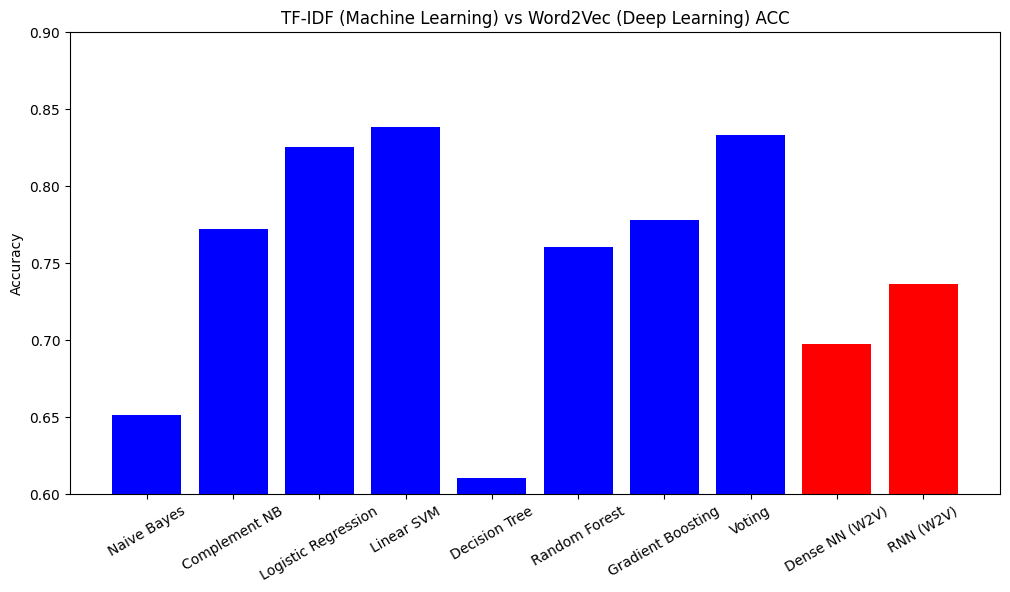

In [84]:
import matplotlib.pyplot as plt

models = [
    'Naive Bayes', 
    'Complement NB', 
    'Logistic Regression', 
    'Linear SVM', 
    'Decision Tree', 
    'Random Forest', 
    'Gradient Boosting', 
    'Voting',
    'Dense NN (W2V)', 
    'RNN (W2V)'
]

accuracy = [
    0.651, 
    0.772, 
    0.825, 
    0.838,
    0.610, 
    0.760, 
    0.778, 
    0.833,
    0.697, 
    0.736
]

plt.figure(figsize=(12,6))
plt.bar(models, accuracy, color = ['blue']*8 + ['red']*2)
plt.xticks(rotation=30)
plt.ylabel('Accuracy')
plt.title('TF-IDF (Machine Learning) vs Word2Vec (Deep Learning) ACC')
plt.ylim(0.6, 0.9)
plt.show()
